# Region and The World Color Survey: Final Project

COG 260: Data, Computation, and The Mind (Yang Xu)

Data source: http://www1.icsi.berkeley.edu/wcs/data.html

______________________________________________

Import helper function file for WCS data analysis.

In [33]:
from wcs_helper_functions import *

Import relevant Python libraries.

In [52]:
import numpy as np
from scipy import stats
from random import random
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt



`munsellInfo` is a 2-element tuple with dictionary elements.

In [35]:
munsellInfo = readChipData('./WCS_data_core/chip.txt')


`namingData` is a hierarchical dictionary organized as follows:

**language _(1 - 110)_ &rarr; speaker _(1 - *range varies per language*)_ &rarr; chip index _(1 - 330)_ &rarr; color term**

In [36]:
namingData = readNamingData('./WCS_data_core/term.txt')

In [37]:
fociData = readFociData('./WCS_data_core/foci-exp.txt')



In [43]:
# Helper fucntion for extracting the language and the region
def readlanguageData(namingDataFilePath):
    namingData = {}  # empty dict
    fileHandler = open(namingDataFilePath,'r')

    for line in fileHandler:              			# for each line in the file
        lineElements = line.split()     			# lineElements are denoted by white space
        
    

        languageNumber = int(lineElements[0])    	
        languageName = str(lineElements[1])  		
        country = str(lineElements[2])   

        if not (languageNumber in namingData.keys()):    						# if this language isn't a key in the namingData dict
            namingData[languageNumber] = {}

        namingData[languageNumber][languageName] =  country

    fileHandler.close()				# close file after reading it in, for neatness
    return namingData

languageData = readlanguageData('./WCS_data_core/language.txt')
languageData

{1: {'Abidji': 'Ivory'},
 2: {'Agarabi': 'Papua'},
 3: {'Casiguran': 'Philippines'},
 4: {'Aguacateco': 'Guatemala'},
 5: {'Amarakaeri': 'Peru'},
 6: {'Ampeeli': 'Papua'},
 7: {'Amuzgo': 'Mexico'},
 8: {'Angaatiha': 'Papua'},
 9: {'Apinaye': 'Brazil'},
 10: {'Arabela': 'Peru'},
 11: {'Bahinemo': 'Papua'},
 12: {'Bauzi': 'Indonesia'},
 13: {'Berik': 'Indonesia'},
 14: {'Bete': 'Ivory'},
 15: {'Bhili': 'India'},
 16: {'Buglere': 'Panama'},
 17: {'Cakchiquel': 'Guatemala'},
 18: {'Ucayali_Campa': 'Peru'},
 19: {'Camsa': 'Colombia'},
 20: {'Candoshi': 'Peru'},
 21: {'Cavinea': 'Bolivia'},
 22: {'Cayapa': 'Ecuador'},
 23: {'Chcobo': 'Bolivia'},
 24: {'Chavacano': 'Philippines'},
 25: {'Chayahuita': 'Peru'},
 26: {'Chinanteco': 'Mexico'},
 27: {'Chiquitano': 'Bolivia'},
 28: {'Chumburu': 'Ghana'},
 29: {'Cofan': 'Ecuador'},
 30: {'Colorado': 'Nevada'},
 31: {'Eastern_Cree': 'Canada'},
 32: {'Culina': 'Brazil'},
 33: {'Didinga': 'Sudan'},
 34: {'Djuka': 'Suriname'},
 35: {'Dyimini': 'Ivory'},

Scatterplot of Mean Number of Color Terms per Chip per Language vs Latitude

# Blue and Green
Range (15 - 30)

In [39]:
# here we want to look at the foci data and get all the eperimental data for each language that is Blue/Green (colour chip  15 -30)
bg_chip_coordintes = {}
for language in fociData:
    total_terms = np.array([])
    # length = len (fociData[language])
    for speaker in fociData[language]:
        for chip in fociData[language][speaker]:
            for i in range(len(fociData[language][speaker][chip])):
                colour = int(fociData[language][speaker][chip][i].split(':')[1])
                if colour >= 15 and colour <= 30:
                    total_terms = np.append(total_terms, fociData[language][speaker][chip][i])
    unique_terms = set(total_terms)
    bg_chip_coordintes[language] = len(unique_terms) 
print(bg_chip_coordintes)


average_bg_chip_coordintes = {}
for language in bg_chip_coordintes:
    average_bg_chip_coordintes[language] = bg_chip_coordintes[language] / mean_color_terms_per_chip[language]
print(average_bg_chip_coordintes)


bg_chip_terms = {}
for language in fociData:
    total_terms = np.array([])
    # length = len (fociData[language])
    for speaker in fociData[language]:
        for chip in fociData[language][speaker]:
            for i in range(len(fociData[language][speaker][chip])):
                colour = int(fociData[language][speaker][chip][i].split(':')[1])
                if colour >= 15 and colour <= 30:
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            total_terms = np.append(total_terms, key)
    unique_terms = set(total_terms)
    bg_chip_terms[language] = len(unique_terms) 
print(bg_chip_terms)

## new version of calculating avg proportion of green blue color terms identified for 
## chips corresponding to blue green color hues
def calculate_avg_proportion(fociData):
    avg_prop = {}
    for language in fociData:
        prop_list = np.array([])
        for speaker in fociData[language]:
            unique_terms = set()
            total_chips = 0
            for term, chips in fociData[language][speaker].items():
                for chip in chips:
                    chip_number = int(chip.split(':')[1])
                    if 15 <= chip_number <= 30:
                        unique_terms.add(term)
                        total_chips += 1
            if total_chips > 0:
                proportion = len(unique_terms) / total_chips
            else:
                proportion = 0
            prop_list = np.append(prop_list, proportion)
        avg_prop[language] = np.mean(prop_list)
    return avg_prop
avg_bg_proportions = calculate_avg_proportion(fociData)
print(avg_bg_proportions)



{1: 34, 2: 68, 3: 45, 4: 83, 5: 25, 6: 74, 7: 59, 8: 38, 9: 35, 10: 92, 11: 33, 12: 40, 13: 66, 14: 15, 15: 17, 16: 24, 17: 124, 18: 112, 19: 29, 20: 20, 21: 17, 22: 40, 23: 26, 24: 27, 25: 7, 26: 23, 27: 39, 28: 29, 29: 15, 30: 27, 31: 14, 32: 128, 33: 4, 34: 39, 35: 25, 36: 0, 37: 12, 38: 38, 39: 44, 40: 29, 41: 49, 42: 36, 43: 47, 44: 25, 45: 23, 46: 23, 47: 20, 48: 23, 49: 20, 50: 72, 51: 117, 52: 80, 53: 56, 54: 55, 55: 26, 56: 17, 57: 68, 58: 35, 59: 35, 60: 20, 61: 8, 62: 34, 63: 117, 64: 51, 65: 22, 66: 112, 67: 69, 68: 30, 69: 30, 70: 31, 71: 26, 72: 45, 73: 16, 74: 16, 75: 27, 76: 26, 77: 1, 78: 10, 79: 26, 80: 59, 81: 27, 82: 33, 83: 33, 84: 46, 85: 15, 86: 31, 87: 43, 88: 30, 89: 28, 90: 25, 91: 13, 92: 15, 93: 10, 94: 26, 95: 80, 96: 32, 97: 18, 98: 79, 99: 23, 100: 24, 101: 25, 102: 63, 103: 59, 104: 2, 105: 0, 106: 25, 107: 52, 108: 18, 109: 55, 110: 31}
{1: 3.7777777777777777, 2: 2.4285714285714284, 3: 0.6338028169014085, 4: 3.32, 5: 2.7777777777777777, 6: 1.76190476190

# Purple
Range (31- 37)

In [40]:
p_chip_coordintes = {}
for language in fociData:
    total_terms = np.array([])
    # length = len (fociData[language])
    for speaker in fociData[language]:
        for chip in fociData[language][speaker]:
            for i in range(len(fociData[language][speaker][chip])):
                colour = int(fociData[language][speaker][chip][i].split(':')[1])
                if colour >= 31 and colour <= 37:
                    total_terms = np.append(total_terms, fociData[language][speaker][chip][i])
    unique_terms = set(total_terms)
    p_chip_coordintes[language] = len(unique_terms) 
print(p_chip_coordintes)

average_p_chip_coordintes = {}
for language in p_chip_coordintes:
    average_p_chip_coordintes[language] = p_chip_coordintes[language] / mean_color_terms_per_chip[language]
print(average_p_chip_coordintes)

p_chip_terms = {}
for language in fociData:
    total_terms = np.array([])
    # length = len (fociData[language])
    for speaker in fociData[language]:
        for chip in fociData[language][speaker]:
            for i in range(len(fociData[language][speaker][chip])):
                colour = int(fociData[language][speaker][chip][i].split(':')[1])
                if colour >= 31 and colour <= 37:
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            total_terms = np.append(total_terms, key)
    unique_terms = set(total_terms)
    p_chip_terms[language] = len(unique_terms) 
print(p_chip_terms)

## new version of calculating avg proportion of purple color terms identified for 
## chips corresponding to purple color hues
def calculate_avg_proportion(fociData):
    avg_prop = {}
    for language in fociData:
        prop_list = np.array([])
        for speaker in fociData[language]:
            unique_terms = set()
            total_chips = 0
            for term, chips in fociData[language][speaker].items():
                for chip in chips:
                    chip_number = int(chip.split(':')[1])
                    if 31 <= chip_number <= 37:
                        unique_terms.add(term)
                        total_chips += 1
            if total_chips > 0:
                proportion = len(unique_terms) / total_chips
            else:
                proportion = 0
            prop_list = np.append(prop_list, proportion)
        avg_prop[language] = np.mean(prop_list)
    return avg_prop
avg_proportions = calculate_avg_proportion(fociData)
print(avg_proportions)


{1: 20, 2: 17, 3: 1, 4: 21, 5: 11, 6: 17, 7: 20, 8: 9, 9: 8, 10: 36, 11: 7, 12: 6, 13: 1, 14: 3, 15: 15, 16: 6, 17: 50, 18: 51, 19: 16, 20: 1, 21: 0, 22: 11, 23: 3, 24: 16, 25: 4, 26: 10, 27: 18, 28: 21, 29: 14, 30: 1, 31: 2, 32: 56, 33: 2, 34: 10, 35: 3, 36: 0, 37: 2, 38: 19, 39: 19, 40: 8, 41: 18, 42: 14, 43: 16, 44: 5, 45: 17, 46: 21, 47: 2, 48: 1, 49: 2, 50: 12, 51: 33, 52: 37, 53: 0, 54: 9, 55: 10, 56: 3, 57: 33, 58: 10, 59: 13, 60: 2, 61: 1, 62: 5, 63: 46, 64: 22, 65: 9, 66: 44, 67: 36, 68: 15, 69: 18, 70: 1, 71: 15, 72: 41, 73: 5, 74: 0, 75: 14, 76: 8, 77: 9, 78: 5, 79: 16, 80: 19, 81: 5, 82: 2, 83: 8, 84: 28, 85: 7, 86: 14, 87: 6, 88: 14, 89: 9, 90: 2, 91: 5, 92: 3, 93: 1, 94: 11, 95: 19, 96: 5, 97: 0, 98: 40, 99: 1, 100: 3, 101: 15, 102: 27, 103: 25, 104: 0, 105: 0, 106: 24, 107: 21, 108: 9, 109: 25, 110: 19}
{1: 2.2222222222222223, 2: 0.6071428571428571, 3: 0.014084507042253521, 4: 0.84, 5: 1.2222222222222223, 6: 0.40476190476190477, 7: 0.9523809523809523, 8: 0.52941176470588

# Pink Red
Range 38- 40 and 1 - 3

In [41]:
# here we want to look at the foci data and get all the eperimental data for each language that is Blue/Green (colour chip  15 -30)
pr_chip_coordintes = {}
for language in fociData:
    total_terms = np.array([])
    # length = len (fociData[language])
    for speaker in fociData[language]:
        for chip in fociData[language][speaker]:
            for i in range(len(fociData[language][speaker][chip])):
                colour = int(fociData[language][speaker][chip][i].split(':')[1])
                if (colour >= 38 and colour <= 40) or (colour >= 1 and colour <= 3):
                    total_terms = np.append(total_terms, fociData[language][speaker][chip][i])
    unique_terms = set(total_terms)
    pr_chip_coordintes[language] = len(unique_terms) 
print(pr_chip_coordintes)


average_pr_chip_coordintes = {}
for language in bg_chip_coordintes:
    average_pr_chip_coordintes[language] = pr_chip_coordintes[language] / mean_color_terms_per_chip[language]
print(average_pr_chip_coordintes)


pr_chip_terms = {}
for language in fociData:
    total_terms = np.array([])
    # length = len (fociData[language])
    for speaker in fociData[language]:
        for chip in fociData[language][speaker]:
            for i in range(len(fociData[language][speaker][chip])):
                colour = int(fociData[language][speaker][chip][i].split(':')[1])
                if (colour >= 38 and colour <= 40) or (colour >= 1 and colour <= 3):
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            total_terms = np.append(total_terms, key)
    unique_terms = set(total_terms)
    pr_chip_terms[language] = len(unique_terms) 
print(pr_chip_terms)

## new version of calculating avg proportion of green blue color terms identified for 
## chips corresponding to blue green color hues
def calculate_avg_proportion(fociData):
    avg_prop = {}
    for language in fociData:
        prop_list = np.array([])
        for speaker in fociData[language]:
            unique_terms = set()
            total_chips = 0
            for term, chips in fociData[language][speaker].items():
                for chip in chips:
                    chip_number = int(chip.split(':')[1])
                    if (chip_number >= 38 and chip_number <= 40) or (chip_number >= 1 and chip_number <= 3):
                        unique_terms.add(term)
                        total_chips += 1
            if total_chips > 0:
                proportion = len(unique_terms) / total_chips
            else:
                proportion = 0
            prop_list = np.append(prop_list, proportion)
        avg_prop[language] = np.mean(prop_list)
    return avg_prop
avg_pr_proportions = calculate_avg_proportion(fociData)
print(avg_pr_proportions)



{1: 31, 2: 26, 3: 16, 4: 25, 5: 12, 6: 30, 7: 29, 8: 17, 9: 18, 10: 42, 11: 19, 12: 17, 13: 20, 14: 12, 15: 25, 16: 14, 17: 48, 18: 46, 19: 24, 20: 19, 21: 8, 22: 19, 23: 11, 24: 27, 25: 10, 26: 29, 27: 26, 28: 20, 29: 13, 30: 8, 31: 6, 32: 48, 33: 8, 34: 24, 35: 8, 36: 9, 37: 9, 38: 25, 39: 26, 40: 12, 41: 21, 42: 21, 43: 35, 44: 12, 45: 13, 46: 24, 47: 7, 48: 13, 49: 21, 50: 12, 51: 45, 52: 38, 53: 10, 54: 21, 55: 21, 56: 16, 57: 43, 58: 18, 59: 28, 60: 15, 61: 4, 62: 14, 63: 45, 64: 37, 65: 17, 66: 48, 67: 35, 68: 22, 69: 16, 70: 13, 71: 10, 72: 42, 73: 11, 74: 10, 75: 19, 76: 27, 77: 29, 78: 5, 79: 12, 80: 19, 81: 10, 82: 11, 83: 30, 84: 27, 85: 23, 86: 14, 87: 17, 88: 28, 89: 25, 90: 24, 91: 12, 92: 24, 93: 12, 94: 10, 95: 24, 96: 7, 97: 21, 98: 37, 99: 7, 100: 9, 101: 15, 102: 30, 103: 35, 104: 10, 105: 5, 106: 34, 107: 27, 108: 13, 109: 36, 110: 13}
{1: 3.4444444444444446, 2: 0.9285714285714286, 3: 0.22535211267605634, 4: 1.0, 5: 1.3333333333333333, 6: 0.7142857142857143, 7: 1.3

# Orange Yellow
Range( 4 - 14)

In [42]:
# here we want to look at the foci data and get all the eperimental data for each language that is Blue/Green (colour chip  15 -30)
oy_chip_coordintes = {}
for language in fociData:
    total_terms = np.array([])
    # length = len (fociData[language])
    for speaker in fociData[language]:
        for chip in fociData[language][speaker]:
            for i in range(len(fociData[language][speaker][chip])):
                colour = int(fociData[language][speaker][chip][i].split(':')[1])
                if colour >= 4 and colour <= 14:
                    total_terms = np.append(total_terms, fociData[language][speaker][chip][i])
    unique_terms = set(total_terms)
    oy_chip_coordintes[language] = len(unique_terms) 
print(oy_chip_coordintes)


average_oy_chip_coordintes = {}
for language in bg_chip_coordintes:
    average_oy_chip_coordintes[language] = oy_chip_coordintes[language] / mean_color_terms_per_chip[language]
print(average_oy_chip_coordintes)


oy_chip_terms = {}
for language in fociData:
    total_terms = np.array([])
    # length = len (fociData[language])
    for speaker in fociData[language]:
        for chip in fociData[language][speaker]:
            for i in range(len(fociData[language][speaker][chip])):
                colour = int(fociData[language][speaker][chip][i].split(':')[1])
                if colour >= 4 and colour <= 14:
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            total_terms = np.append(total_terms, key)
    unique_terms = set(total_terms)
    oy_chip_terms[language] = len(unique_terms) 
print(oy_chip_terms)

## new version of calculating avg proportion of green blue color terms identified for 
## chips corresponding to blue green color hues
def calculate_avg_proportion(fociData):
    avg_prop = {}
    for language in fociData:
        prop_list = np.array([])
        for speaker in fociData[language]:
            unique_terms = set()
            total_chips = 0
            for term, chips in fociData[language][speaker].items():
                for chip in chips:
                    chip_number = int(chip.split(':')[1])
                    if 4 <= chip_number <= 14:
                        unique_terms.add(term)
                        total_chips += 1
            if total_chips > 0:
                proportion = len(unique_terms) / total_chips
            else:
                proportion = 0
            prop_list = np.append(prop_list, proportion)
        avg_prop[language] = np.mean(prop_list)
    return avg_prop
avg_oy_proportions = calculate_avg_proportion(fociData)
print(avg_oy_proportions)

{1: 37, 2: 47, 3: 13, 4: 61, 5: 15, 6: 47, 7: 34, 8: 16, 9: 25, 10: 76, 11: 25, 12: 26, 13: 25, 14: 12, 15: 25, 16: 13, 17: 85, 18: 77, 19: 27, 20: 10, 21: 18, 22: 29, 23: 3, 24: 34, 25: 9, 26: 24, 27: 42, 28: 25, 29: 8, 30: 13, 31: 8, 32: 88, 33: 4, 34: 21, 35: 28, 36: 4, 37: 9, 38: 27, 39: 40, 40: 18, 41: 43, 42: 28, 43: 41, 44: 33, 45: 24, 46: 29, 47: 20, 48: 14, 49: 27, 50: 17, 51: 78, 52: 52, 53: 21, 54: 18, 55: 27, 56: 19, 57: 59, 58: 21, 59: 23, 60: 13, 61: 19, 62: 21, 63: 76, 64: 42, 65: 36, 66: 70, 67: 56, 68: 29, 69: 33, 70: 22, 71: 20, 72: 60, 73: 13, 74: 1, 75: 27, 76: 39, 77: 13, 78: 8, 79: 21, 80: 31, 81: 10, 82: 10, 83: 31, 84: 29, 85: 23, 86: 15, 87: 17, 88: 32, 89: 24, 90: 28, 91: 14, 92: 22, 93: 22, 94: 12, 95: 45, 96: 19, 97: 29, 98: 55, 99: 15, 100: 11, 101: 17, 102: 36, 103: 49, 104: 1, 105: 2, 106: 32, 107: 29, 108: 10, 109: 36, 110: 20}
{1: 4.111111111111111, 2: 1.6785714285714286, 3: 0.18309859154929578, 4: 2.44, 5: 1.6666666666666667, 6: 1.119047619047619, 7: 1

# Data Visualization
Here we are going to look at different colour groups compared to their proximity to the equator


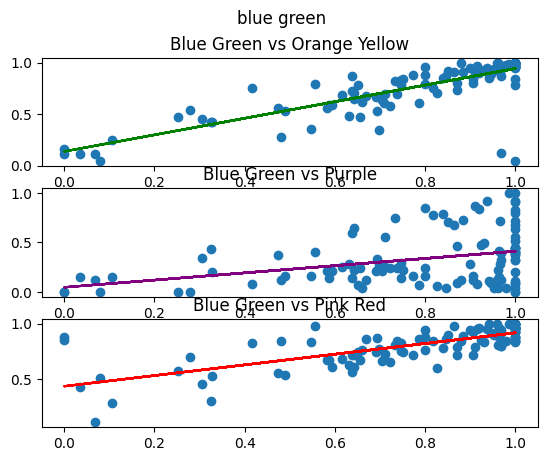

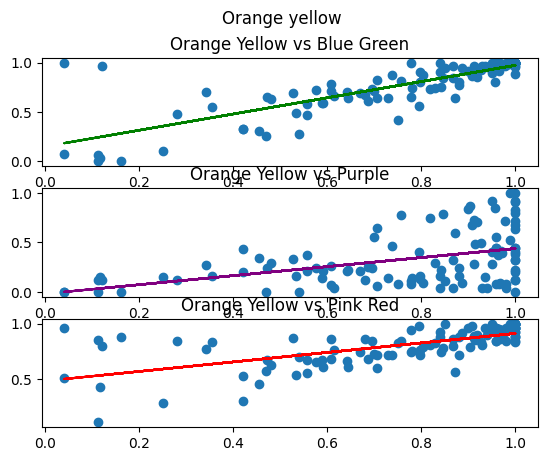

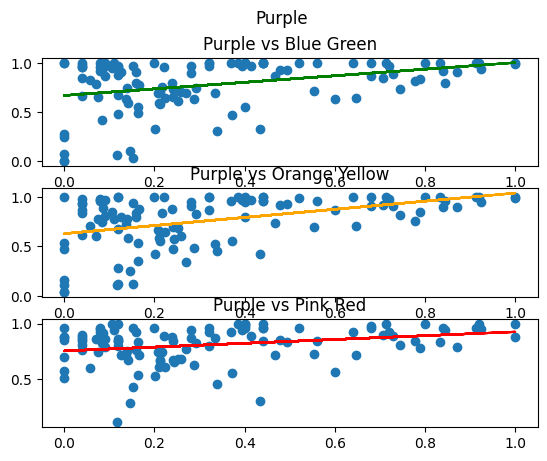

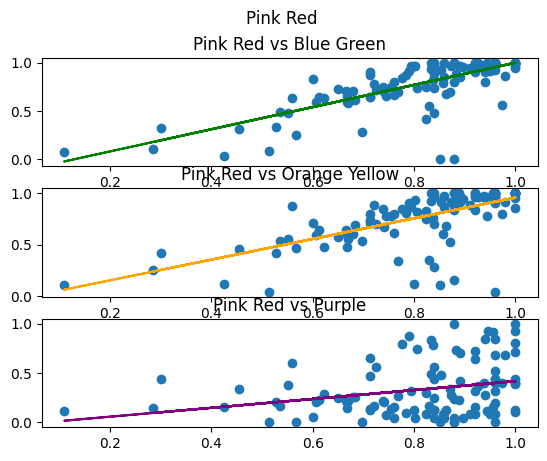

In [68]:

bg = [] # proportion of blue green terms identified
oy = [] # proportion of orange yellow terms identified
p = [] # proportion of purple terms identified
pr = [] # proportion of pink red terms identified
for language in avg_bg_proportions:
    bg.append(avg_bg_proportions[language])
    oy.append(avg_oy_proportions[language])
    p.append(avg_proportions[language])
    pr.append(avg_pr_proportions[language])

bg = np.array(bg)
oy = np.array(oy)
p = np.array(p)
pr = np.array(pr)

# ======================== Green/ Blue=========================================== #
fig, axs = plt.subplots(3)
fig.suptitle('blue green')
axs[0].scatter(bg, oy)
axs[0].set_title('Blue Green vs Orange Yellow')
values = np.polyfit(bg, oy, 1) # produces a list  as ( slope, intercept)
fit_line = values[0] * bg + values[1]
axs[0].plot(bg, fit_line, c = 'green')


axs[1].scatter(bg, p)
axs[1].set_title('Blue Green vs Purple')
values = np.polyfit(bg, p, 1) # produces a list  as ( slope, intercept)
fit_line = values[0] * bg + values[1]
axs[1].plot(bg, fit_line, c = 'purple')

axs[2].scatter(bg, pr)
axs[2].set_title('Blue Green vs Pink Red')
values = np.polyfit(bg, pr, 1) # produces a list  as ( slope, intercept)
fit_line = values[0] * bg + values[1]
axs[2].plot(bg, fit_line, c = 'red')

# ======================== Orange Yellow=========================================== # 

fig, axs = plt.subplots(3)
fig.suptitle('Orange yellow')
axs[0].scatter(oy, bg)
axs[0].set_title('Orange Yellow vs Blue Green')
values = np.polyfit(oy, bg, 1) # produces a list  as ( slope, intercept)
fit_line = values[0] * oy + values[1]
axs[0].plot(oy, fit_line, c = 'green')

axs[1].scatter(oy, p)
axs[1].set_title('Orange Yellow vs Purple')
values = np.polyfit(oy, p, 1) # produces a list  as ( slope, intercept)
fit_line = values[0] * oy + values[1]
axs[1].plot(oy, fit_line, c = 'purple')

axs[2].scatter(oy, pr)
axs[2].set_title('Orange Yellow vs Pink Red')
values = np.polyfit(oy, pr, 1) # produces a list  as ( slope, intercept)
fit_line = values[0] * oy + values[1]
axs[2].plot(oy, fit_line, c = 'red')

# ======================== Purple=========================================== #

fig, axs = plt.subplots(3)
fig.suptitle('Purple')

axs[0].scatter(p, bg)
axs[0].set_title('Purple vs Blue Green')
values = np.polyfit(p, bg, 1) # produces a list  as ( slope, intercept)
fit_line = values[0] * p + values[1]
axs[0].plot(p, fit_line, c = 'green')

axs[1].scatter(p, oy)
axs[1].set_title('Purple vs Orange Yellow')
values = np.polyfit(p, oy, 1) # produces a list  as ( slope, intercept)
fit_line = values[0] * p + values[1]
axs[1].plot(p, fit_line, c = 'orange')

axs[2].scatter(p, pr)
axs[2].set_title('Purple vs Pink Red')
values = np.polyfit(p, pr, 1) # produces a list  as ( slope, intercept)
fit_line = values[0] * p + values[1]
axs[2].plot(p, fit_line, c = 'red')


# ======================== Pink Red=========================================== #

fig, axs = plt.subplots(3)
fig.suptitle('Pink Red')

axs[0].scatter(pr, bg)
axs[0].set_title('Pink Red vs Blue Green')
values = np.polyfit(pr, bg, 1) # produces a list  as ( slope, intercept)
fit_line = values[0] * pr + values[1]
axs[0].plot(pr, fit_line, c = 'green')

axs[1].scatter(pr, oy)
axs[1].set_title('Pink Red vs Orange Yellow')
values = np.polyfit(pr, oy, 1) # produces a list  as ( slope, intercept)
fit_line = values[0] * pr + values[1]
axs[1].plot(pr, fit_line, c = 'orange')

axs[2].scatter(pr, p)
axs[2].set_title('Pink Red vs Purple')
values = np.polyfit(pr, p, 1) # produces a list  as ( slope, intercept)
fit_line = values[0] * pr + values[1]
axs[2].plot(pr, fit_line, c = 'purple')



# Data Summary

In [51]:
# the total number of unique chips for each language
total_chips = {}
for language in fociData:
    unique_terms = set()
    for speaker in fociData[language]:
        for term, chips in fociData[language][speaker].items():
            for chip in chips:
                unique_terms.add(chip)
    total_chips[language] = len(unique_terms)
print(total_chips)


{1: 126, 2: 163, 3: 77, 4: 199, 5: 67, 6: 173, 7: 151, 8: 83, 9: 91, 10: 256, 11: 86, 12: 96, 13: 118, 14: 47, 15: 84, 16: 59, 17: 317, 18: 293, 19: 105, 20: 54, 21: 53, 22: 101, 23: 45, 24: 109, 25: 36, 26: 88, 27: 133, 28: 98, 29: 52, 30: 52, 31: 36, 32: 330, 33: 22, 34: 98, 35: 66, 36: 16, 37: 35, 38: 119, 39: 137, 40: 74, 41: 141, 42: 106, 43: 146, 44: 78, 45: 79, 46: 105, 47: 54, 48: 55, 49: 73, 50: 119, 51: 283, 52: 213, 53: 87, 54: 108, 55: 87, 56: 60, 57: 213, 58: 89, 59: 103, 60: 55, 61: 36, 62: 82, 63: 293, 64: 158, 65: 87, 66: 284, 67: 205, 68: 102, 69: 101, 70: 72, 71: 78, 72: 198, 73: 48, 74: 32, 75: 95, 76: 105, 77: 58, 78: 30, 79: 77, 80: 133, 81: 54, 82: 59, 83: 104, 84: 135, 85: 75, 86: 77, 87: 85, 88: 111, 89: 93, 90: 83, 91: 47, 92: 67, 93: 47, 94: 61, 95: 174, 96: 65, 97: 72, 98: 221, 99: 53, 100: 49, 101: 75, 102: 164, 103: 175, 104: 15, 105: 10, 106: 121, 107: 132, 108: 52, 109: 161, 110: 89}


In [49]:
# Make a dataframe with each language and the number of each colour group of chips

df = pd.DataFrame({'language': list(languageData.keys()), 'bg_chip_coordintes': list(bg_chip_coordintes.values()), 'p_chip_coordintes': list(p_chip_coordintes.values()), 'pr_chip_coordintes': list(pr_chip_coordintes.values()), 'oy_chip_coordintes': list(oy_chip_coordintes.values()), 'total_chips': list(total_chips.values())})
df

,language,bg_chip_coordintes,p_chip_coordintes,pr_chip_coordintes,oy_chip_coordintes,total_chips
0,1,34,20,31,37,126
1,2,68,17,26,47,163
2,3,45,1,16,13,77
3,4,83,21,25,61,199
4,5,25,11,12,15,67
...,...,...,...,...,...,...
105,106,25,24,34,32,121
106,107,52,21,27,29,132
107,108,18,9,13,10,52
108,109,55,25,36,36,161
